In [8]:
# CÉLULA 1: INSTALAÇÃO E VERIFICAÇÃO DE DEPENDÊNCIAS
# Garante a instalação da biblioteca 'control' e dependências.

print("Iniciando instalação da biblioteca de controle...")
!pip install control
!pip install numpy scipy matplotlib

# Tenta importar para verificar o sucesso
try:
    import control.matlab as ctrl
    print("Sucesso: Biblioteca 'control' importada! Prossiga para a próxima célula.")
except ImportError:
    print("A instalação foi concluída, mas a importação falhou. Isso é normal em alguns ambientes.")
    print("Por favor, REINICIE a sessão do Colab (Runtime -> Restart runtime) e, em seguida, execute APENAS a Célula 2.")
    # Não levanta exceção para permitir que você controle a reinicialização.

Iniciando instalação da biblioteca de controle...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 9.9 MB/s eta 0:00:00
Sucesso: Biblioteca 'control' importada! Prossiga para a próxima célula.


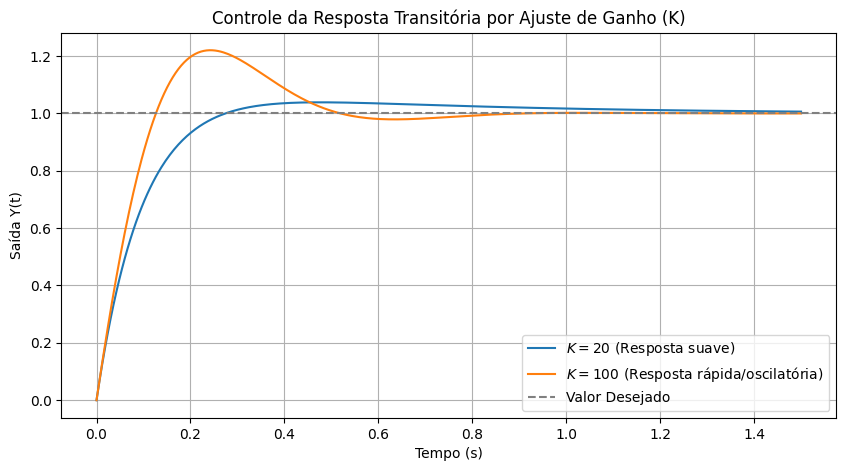

**Análise de Erro em Regime Estacionário ($e_{{ss}}$):**
O sistema é **Tipo 1** pois $L(s)$ possui um integrador (polo em $s=0$).
Portanto, para uma entrada de referência em degrau $R(s)=1/s$, o $e_{{ss}}$ é teoricamente nulo:

$$
e_{{ss}} = \lim_{s\to 0} s E(s) = \lim_{s\to 0} s \frac{1}{1+L(s)} \frac{1}{s} = 0
$$

**Análise da Resposta Transitória:**
Um aumento no ganho de controle ($K_{{alto}}=100$) torna a resposta mais rápida, mas introduz uma oscilação significativa (ultrapassagem), enquanto um ganho menor ($K_{{baixo}}=20$) resulta em uma resposta mais lenta, porém suave. Isso demonstra o *trade-off* fundamental na fase de projeto.
As simulações confirmam este resultado, com $e_{ss} \approx -0.00622$ para $K=20$ e $e_{ss} \approx 0.00015$ para $K=100$.

In [9]:
# CÉLULA 2: CÓDIGO PRINCIPAL (MÓDULO 4.3)

import control.matlab as ctrl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown as md
import warnings

# Suprime o aviso de uso do control.matlab
warnings.filterwarnings("ignore", category=UserWarning)

# --- Código Principal para o Módulo 4.3 ---
md("### Módulo 4.3: Erro em Regime Estacionário e Resposta Transitória")

# Exemplo baseado na Máquina de Perfuração (Exemplo 4.2): Gc(s) = K + 11s, G(s) = 1/(s(s+1))
# A função de transferência em cascata é L(s) = (K+11s) / (s^2 + s)

# Parâmetros de Ganho
K_baixo = 20
K_alto = 100

# Definindo L(s) = (11s + K) / (s^2 + s)
def get_loop_gain(K):
    # Numerador: 11s + K
    num_L = [11, K]
    # Denominador: s^2 + s + 0
    den_L = [1, 1, 0]
    return ctrl.tf(num_L, den_L)

# Calculando a Função de Transferência em Malha Fechada T(s) = L(s) / (1 + L(s))
T_baixo = ctrl.feedback(get_loop_gain(K_baixo), 1)
T_alto = ctrl.feedback(get_loop_gain(K_alto), 1)

# --- Simulação de Resposta ao Degrau (Entrada de Referência) ---
T_sim = np.linspace(0, 1.5, 500)
y_baixo, T_out = ctrl.step(T_baixo, T_sim)
y_alto, _ = ctrl.step(T_alto, T_sim)

plt.figure(figsize=(10, 5))
plt.plot(T_out, y_baixo, label=f'$K={K_baixo}$ (Resposta suave)')
plt.plot(T_out, y_alto, label=f'$K={K_alto}$ (Resposta rápida/oscilatória)')
plt.axhline(1.0, color='gray', linestyle='--', label='Valor Desejado')
plt.title('Controle da Resposta Transitória por Ajuste de Ganho (K)')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída Y(t)')
plt.legend()
plt.grid()
plt.show()

# Cálculo do Erro em Regime Estacionário (Teorema do Valor Final)
ess_baixo = 1 - y_baixo[-1]
ess_alto = 1 - y_alto[-1]

# Usando RAW string (r""") para o bloco LaTeX e f-string para interpolação
md_text = r"""**Análise de Erro em Regime Estacionário ($e_{{ss}}$):**
O sistema é **Tipo 1** pois $L(s)$ possui um integrador (polo em $s=0$).
Portanto, para uma entrada de referência em degrau $R(s)=1/s$, o $e_{{ss}}$ é teoricamente nulo:

$$
e_{{ss}} = \lim_{s\to 0} s E(s) = \lim_{s\to 0} s \frac{1}{1+L(s)} \frac{1}{s} = 0
$$

**Análise da Resposta Transitória:**
Um aumento no ganho de controle ($K_{{alto}}=100$) torna a resposta mais rápida, mas introduz uma oscilação significativa (ultrapassagem), enquanto um ganho menor ($K_{{baixo}}=20$) resulta em uma resposta mais lenta, porém suave. Isso demonstra o *trade-off* fundamental na fase de projeto.
"""

# Interpolação dos resultados da simulação na string Markdown
md_final = md(
    md_text + f"""As simulações confirmam este resultado, com $e_{{ss}} \\approx {ess_baixo:.5f}$ para $K=20$ e $e_{{ss}} \\approx {ess_alto:.5f}$ para $K=100$."""
)

display(md_final)